#  <center> Airnline: Passenger Satisfaction</center>

The data comes from Kaggle and refers to the evaluation of customer satisfaction regarding flights that includes waiting times, travel and services during the flight among other points.

Source: https://www.kaggle.com/datasets/yakhyojon/customer-satisfaction-in-airline


## Library import and data loading

In this analysis, we utilized Python as our primary programming language and Jupyter Notebook as the integrated development environment (IDE) to conduct data exploration and analysis. Before delving into the dataset, we imported the essential libraries that we used in this project. 

In [7]:
# Some libraries are loaded that will be used below
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans
import warnings
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score


### Handling   missing values 

In [8]:
#Load csv file
data=pd.read_csv('Invistico_Airline.csv') 
df=pd.DataFrame(data)

#Remove all rows that contain NaN values in the original Dataframe
df.dropna(inplace=True)

#Reset the index for the original DataFrame. 
df.reset_index(drop=True,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [9]:
#Overview of the first 10 records
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [10]:
#Total rows and columns

df.shape

(129487, 23)

## EDA
The meaning of the content of each of the columns that will be analyzed is explained below.


* `satisfaction`:     whether a passenger is satisfied or not (dependent variable).
* `gender`: whether a passenger is male or female.
* `Customer type`: whether a passenger is loyal or disloyal.
* `Age`: passenger's age from 7-85.                                
* `Type of Travel`: either business or personal.                 
* `Class`: airline's type of classes: business, economy plus or economy.
* `Flight Distance`: distance the flight of a passenger has taken.
* `Seat comfort`: passenger's rating of how comfortable the seat is from 5 being the highest and 0 being the lowest.
* `Departure/Arrival time convenient`: passenger's rating of how convenient the departure/arrival time by the airline is from 5 being the highest and 0 being the lowest.
* `Food and drink`: passenger's rating of how good the food is from 5 being the highest and 0 being the lowest.            
* `Gate location`: passenger's rating of how convenient the gate location is in the airport from 5 being the highest and 0 being the lowest.        
* `Inflight wifi service`: passenger's rating of how stable the in-flight wifi is from 5 being the highest and 0 being the lowest. 
* `Inflight entertainment`: passenger's rating of how good the in-flight entertainment is from 5 being the highest and 0 being the lowest.             
* `Online support`: passenger's rating of how helpful the online support of the airline is from 5 being the highest and 0 being the lowest.         
* `Ease of Online booking`: passenger's rating of how easy it is to book a flight through the airline from 5 being the highest and 0 being the lowest. 
* `On-board service`: passenger's rating of how great the service on board is from 5 being the highest and 0 being the lowest. 
* `Leg room service`: passenger's rating of how comfortable the leg room of the plane is from 5 being the highest and 0 being the lowest. 
* `Baggage handling`: passenger's rating of how careful the airline is in handling their baggage from 5 being the highest and 0 being the lowest. 
* `Checkin service`: passenger's rating of how convenient the checkin service is from 5 being the highest and 0 being the lowest. 
* `Cleanliness`: passenger's rating of how clean the plane is from 5 being the highest and 0 being the lowest. 
* `Online boarding`: passenger's rating of how helpful the online boarding of the airline is from 5 being the highest and 0 being the lowest. 
* `Departure Delay in Minutes`: the delay of departure in minutes of the passenger's flight taken with the airline.
* `Arrival Delay in Minutes`: the delay of arrival in minutes of the passenger's flight taken with the airline.

### Graphs and overview

In this segment, histogram charts are generated to visualize and gain insights on the frequency of the dataset's variables.

<Axes: title={'center': 'Flight Distance Histogram'}, xlabel='Flight Distance', ylabel='Count'>

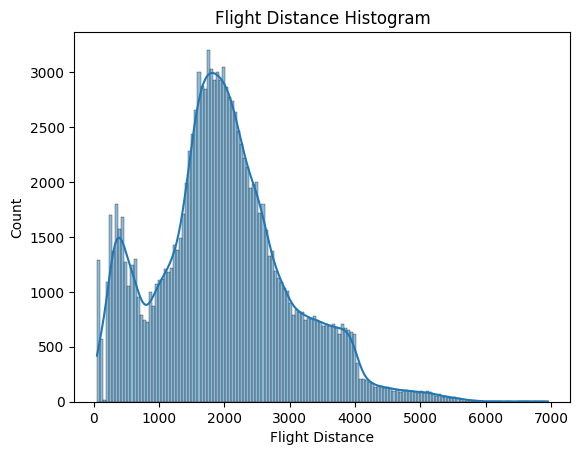

In [11]:
plt.title('Flight Distance Histogram')
sns.histplot(data=df, x='Flight Distance', kde=True)

<Axes: title={'center': 'Age Histogram'}, xlabel='Age', ylabel='Count'>

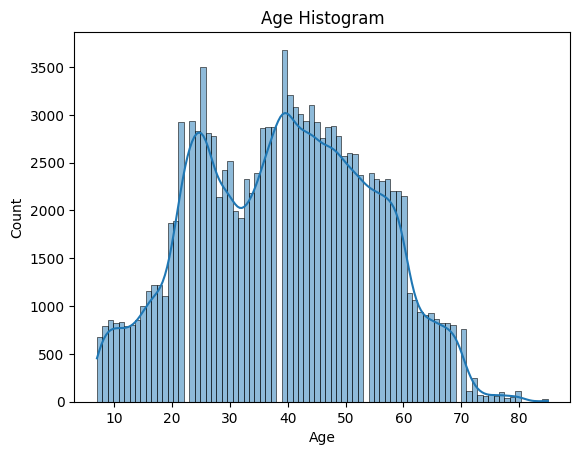

In [12]:
plt.title('Age Histogram')
sns.histplot(data=df, x='Age', kde=True)

<Axes: title={'center': 'Flight Distance Histogram with Type of Class'}, xlabel='Flight Distance', ylabel='Count'>

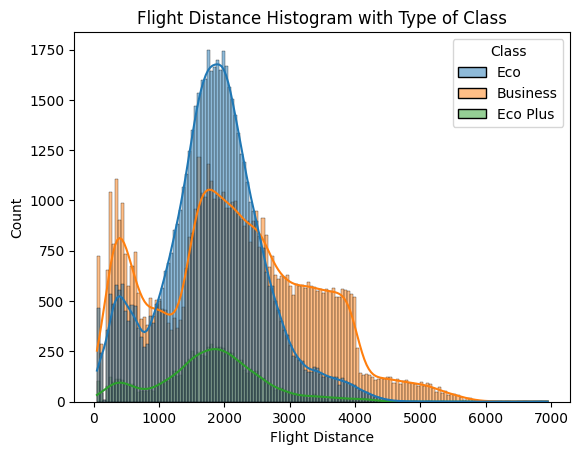

In [13]:
plt.title('Flight Distance Histogram with Type of Class')
sns.histplot(data=df, x='Flight Distance', hue='Class', kde=True)

<Axes: title={'center': 'Flight Distance Histogram with Satisfaction'}, xlabel='Flight Distance', ylabel='Count'>

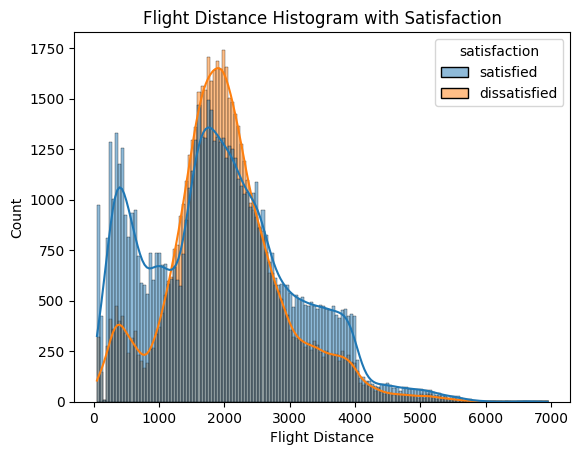

In [14]:
plt.title('Flight Distance Histogram with Satisfaction')
sns.histplot(data=df, x='Flight Distance', hue='satisfaction', kde=True)

<Axes: title={'center': 'Flight Distance Histogram with Type of Travel'}, xlabel='Flight Distance', ylabel='Count'>

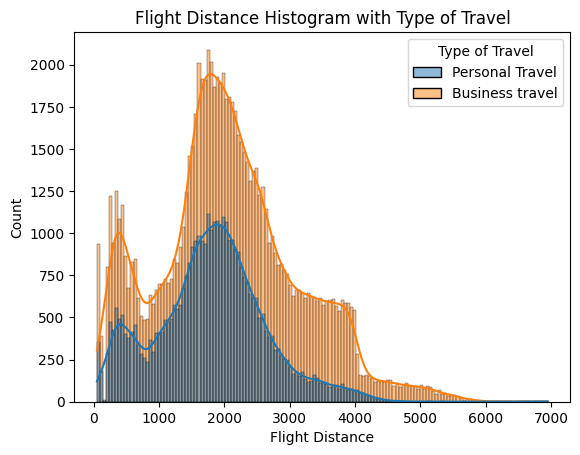

In [15]:
plt.title('Flight Distance Histogram with Type of Travel')
sns.histplot(data=df, x='Flight Distance', hue='Type of Travel', kde=True)

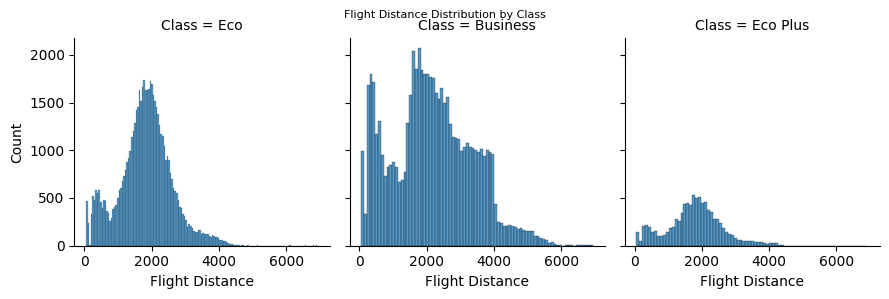

In [16]:
#plt.title('Flight Distance Histogram for each Type of Class')
g = sns.FacetGrid(df, col="Class")
g.map(sns.histplot, "Flight Distance")
g.set_titles(fontsize=12)  
g.set_axis_labels(fontsize=10)  
plt.suptitle("Flight Distance Distribution by Class", fontsize=8)
plt.show()

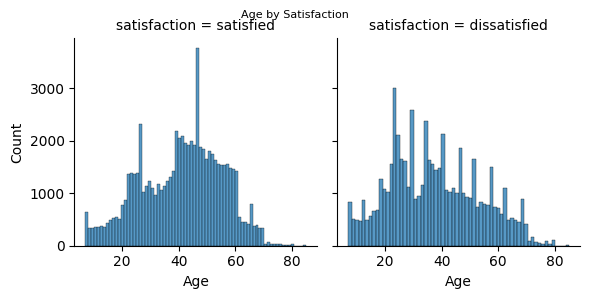

In [17]:
g = sns.FacetGrid(df, col="satisfaction")
g.map(sns.histplot, "Age");
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Age by Satisfaction", fontsize=8)
plt.show()

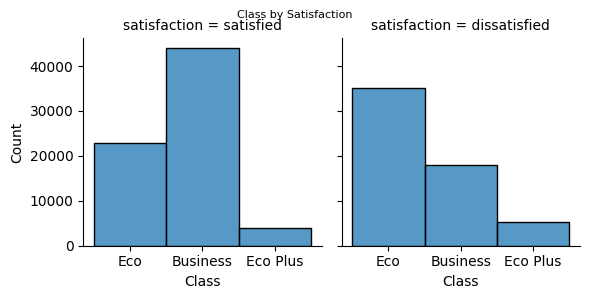

In [18]:
g = sns.FacetGrid(df, col="satisfaction")
g.map(sns.histplot, "Class")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Class by Satisfaction", fontsize=8)
plt.show()


Text(0.5, 1.0, 'Evaluation Seat Comfort')

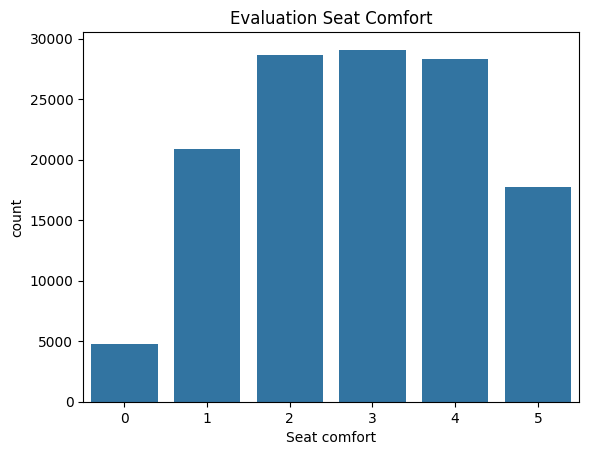

In [19]:
sns.countplot(data=df, x='Seat comfort');
plt.title('Evaluation Seat Comfort')

Text(0.5, 1.0, 'Evaluation Gate Location')

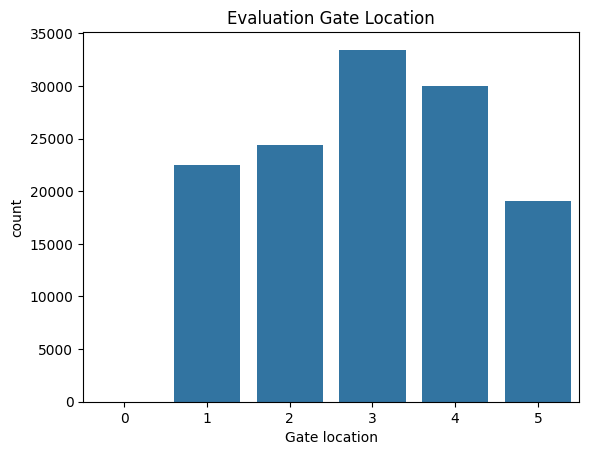

In [20]:
sns.countplot(data=df, x='Gate location')
plt.title('Evaluation Gate Location')

Text(0.5, 1.0, 'Evaluation Inflight Wifi Service')

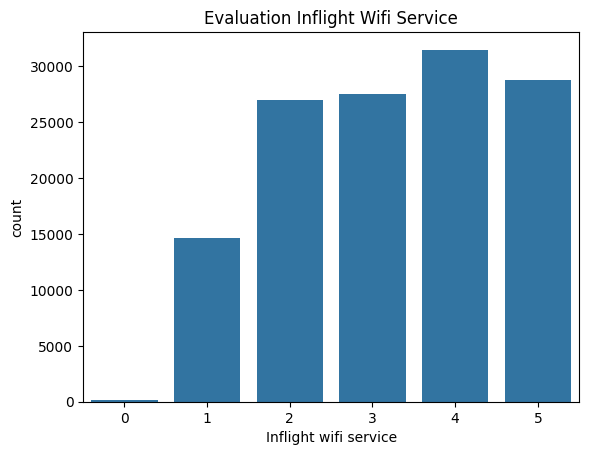

In [21]:
sns.countplot(data=df, x='Inflight wifi service')
plt.title('Evaluation Inflight Wifi Service')

Text(0.5, 1.0, 'Evaluation Inflight Entertainment')

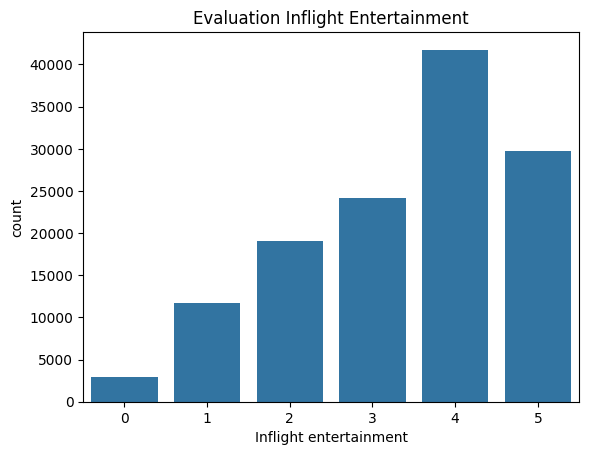

In [22]:

sns.countplot(data=df, x='Inflight entertainment');
plt.title('Evaluation Inflight Entertainment')

Text(0.5, 1.0, 'Age vs Departure Delay in Minutes with Class')

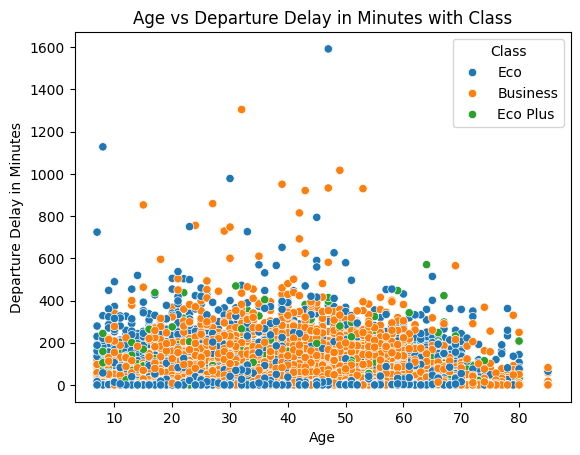

In [23]:
sns.scatterplot(data=df, x='Age', y='Departure Delay in Minutes', hue='Class')
plt.title('Age vs Departure Delay in Minutes with Class')

Text(0.5, 1.0, 'Age vs Arrival Delay in Minutes with Class')

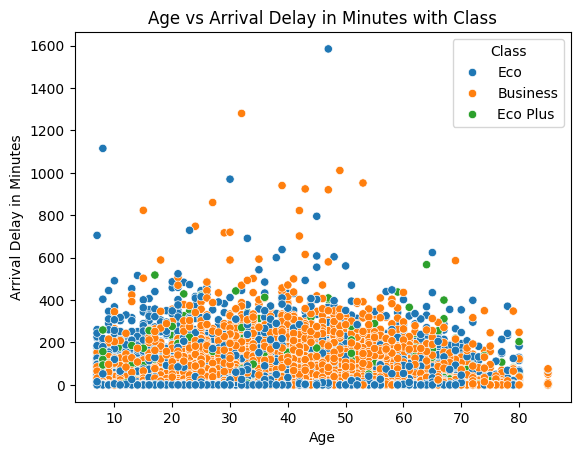

In [24]:
sns.scatterplot(data=df, x='Age', y='Arrival Delay in Minutes', hue='Class')
plt.title('Age vs Arrival Delay in Minutes with Class')

### Correlation Matrix

A correlation matrix performed on this analysis provides a comprehensive overview of the relationships between pairs of variables in our dataset. It assesses the strength and direction of linear associations between variables.

C:\Users\sergi\AppData\Local\Temp\ipykernel_10840\2164059668.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


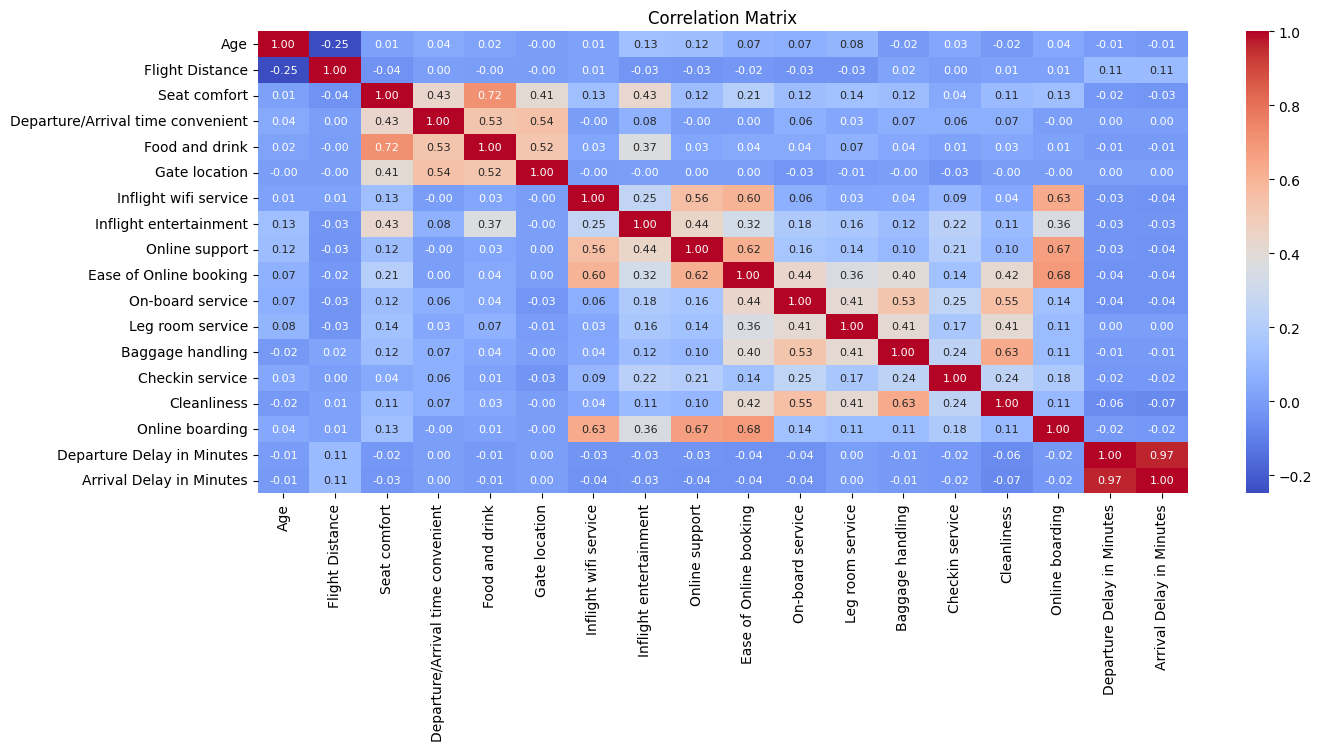

In [25]:
#Create correlation matix

#data_subset = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
#correlation_matrix = data_subset.corr()
correlation_matrix = df.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation Matrix')
plt.show()


### Transform Categorical Data

In this part, the categorical data was transformed into dummy variables. The columns that was transformed are 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink','Gate location', 'Inflight wifi service', 'Inflight entertainment','Online support', 'Ease of Online booking', 'On-board service','Leg room service', 'Baggage handling', 'Checkin service','Cleanliness', and 'Online boarding'.

In [26]:
# Identify categorical features and add columns to transform, that have numerical data but are categorical because they represent service evaluations

cols_to_transform = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                     'Gate location', 'Inflight wifi service', 'Inflight entertainment',
                     'Online support', 'Ease of Online booking', 'On-board service',
                     'Leg room service', 'Baggage handling', 'Checkin service',
                     'Cleanliness', 'Online boarding']

categorical_columns = list(df.select_dtypes('object').columns) + cols_to_transform


In [27]:
# Create dummy variables for each categorical feature

for column in categorical_columns:
    # Create dummy variables with a prefix
    dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
    # Convert True/False to 1/0
    dummy_columns = dummy_columns.astype(int)
    # Add the dummy columns to the original DataFrame
    df = pd.concat([df, dummy_columns], axis=1)
    # Drop the original categorical column from the DataFrame
    df.drop(column, axis=1, inplace=True)

# Display the modified DataFrame with dummy variables
#print("\nDataFrame with dummy variables:")
df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,65,265,0,0.0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,47,2464,310,305.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,15,2138,0,0.0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,60,623,0,0.0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,70,354,0,0.0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [28]:
#After transformation, new dataframe content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age                                  129487 non-null  int64  
 1   Flight Distance                      129487 non-null  int64  
 2   Departure Delay in Minutes           129487 non-null  int64  
 3   Arrival Delay in Minutes             129487 non-null  float64
 4   satisfaction_satisfied               129487 non-null  int32  
 5   Gender_Male                          129487 non-null  int32  
 6   Customer Type_disloyal Customer      129487 non-null  int32  
 7   Type of Travel_Personal Travel       129487 non-null  int32  
 8   Class_Eco                            129487 non-null  int32  
 9   Class_Eco Plus                       129487 non-null  int32  
 10  Seat comfort_1                       129487 non-null  int32  
 11  Seat comfort_

In [29]:
#After the transformation is the new number of records and columns
df.shape

(129487, 79)

Next, the case will be evaluated with three machine learning algorithms: Naive Bayes, Decision Tree and KMeans. The first two correspond to Classification algorithms and KMean is Clustering.

# Applying Classification Method: Naive Bayes

Since we have a generous amount of categorical data, we chose to apply the Naive Bayes classification method. This involves utilizing an approach to predict the class or category of instances based on the features available.

In [30]:
#The split is carried out, leaving the satisfaction variable as the dependent variable.

features = df.drop(['satisfaction_satisfied'], axis=1)
response = df['satisfaction_satisfied']
features.shape

(129487, 78)

### Features Selection with LogisticRegression

We created a pipeline that first selects the optimal features using logistic regression as the estimator and then scales the data using standardization. This pipeline can be used to preprocess the data efficiently before training the Classifier Naive Bayes model we also created after this part.

In [31]:
# Create pipeline that applys selection Clasification and Standard Scaler, first to select the optimal features and then scale the data 

pipe_lr= Pipeline([
    ('logistic_regression', SelectFromModel(estimator = LogisticRegression(max_iter=5000))),
    ('Standard_scaler', StandardScaler())
])
 
pipe_lr.fit(features, response)

Pipeline(steps=[('logistic_regression',
                 SelectFromModel(estimator=LogisticRegression(max_iter=5000))),
                ('Standard_scaler', StandardScaler())])

In [32]:
# Saving the selected feautures with transformations 
X_1= pipe_lr.transform(features)
X_1.shape

(129487, 26)

In [33]:
#Get the features selected 
features_selected_lr = pipe_lr['logistic_regression'].get_support(indices=True)

selected_feature_names_lr = features.columns[features_selected_lr]
#Create a new dataframe with features selected
df_features_selected_lr = pd.DataFrame(X_1, columns=selected_feature_names_lr)
#df_features_selected_lr.head()
df_features_selected_lr.columns

Index(['Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Seat comfort_1', 'Seat comfort_2',
       'Seat comfort_3', 'Seat comfort_4', 'Seat comfort_5',
       'Departure/Arrival time convenient_5', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Inflight entertainment_1', 'Inflight entertainment_2',
       'Inflight entertainment_3', 'Inflight entertainment_5',
       'Online support_1', 'Online support_5', 'Ease of Online booking_3',
       'Ease of Online booking_4', 'On-board service_5', 'Leg room service_5',
       'Checkin service_5', 'Cleanliness_5', 'Online boarding_5'],
      dtype='object')

## Classifier Naive Bayes Model

The creation of the model:

In [34]:
# With the selected and scaled features, the split of the training and testing data is carried out, with 20% for training

X_train, X_test, y_train, y_test = train_test_split( X_1, response, test_size=0.20, random_state=42)


In [35]:
#Using Gaussian Algorithm for method Naive Bayes Classifier

classifiers= [('Naive_Bayes', GaussianNB())]

clf_list=[]
list_accuracy=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_classifier=0

#Pipeline  and using kfold for optimization 
for n, clf in  classifiers:
    pipe_clf= Pipeline([(n,clf) ])
    score = cross_val_score(pipe_clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = np.mean(score)
    clf_list.append(n)
    list_accuracy.append((n, mean_score))
    
    if best_classifier < mean_score:
        best_clf_mean=mean_score
        best_clf=(n, clf)

X_2 = best_clf[1]
results = np.array(list_accuracy)
results_df = pd.DataFrame(results, columns=['Name', 'MeanScore'])
results_df

,Name,MeanScore
0,Naive_Bayes,0.8226355956602298


In [36]:
X_2.fit(X_train, y_train)

GaussianNB()

The Naive Bayes classifier predicted the class of around 81.26% of the instances in the training data across all folds of cross-validation.

## Confusion Matrix - Naive Bayes

The confusion matrix below presents a summary of the model's predictions versus the actual outcomes.

In [37]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

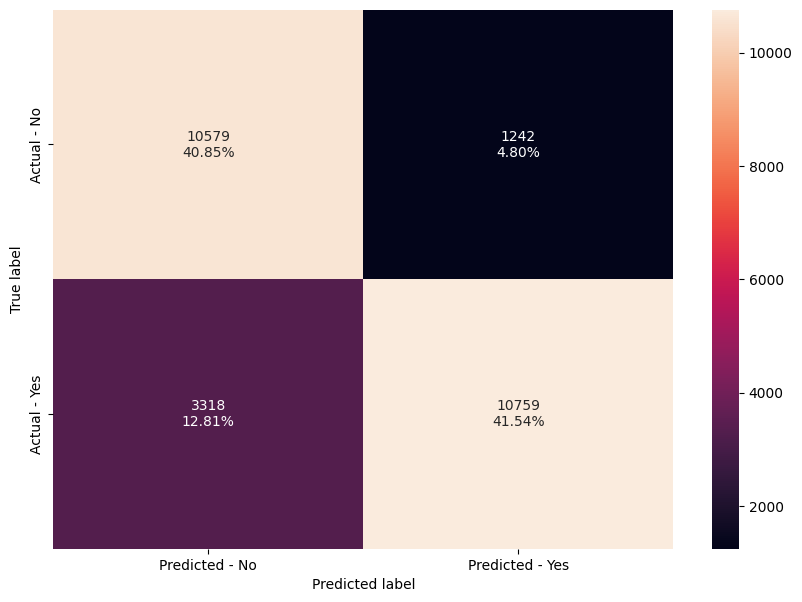

In [39]:
#Genereting Confusion Matrix

make_confusion_matrix(X_2,y_test)

Analysis: XXXXXXXXXXXXXXXXXXX

In [40]:
# Accuracy on train and test
print("Accuracy on training set : ",X_2.score(X_train, y_train))
print("Accuracy on test set : ",X_2.score(X_test, y_test))
# Recall on train and test
get_recall_score(X_2)

Accuracy on training set :  0.8222687737114944
Accuracy on test set :  0.823924627384354
Recall on training set :  0.7612886189595987
Recall on test set :  0.7642963699651915


Accuracy:

* The accuracy on the training set is approximately 82.22%. The classifier correctly predicts the class of about 82.22% of the instances in the training dataset.
* The accuracy on the test set is approximately 82.39%. The classifier correctly predicts the class of about 82.39% of the instances in the test dataset.

Recall:

* The recall on the training set is approximately 76.12%. The classifier correctly identifies about 76.12% of the positive instances in the training dataset.
* The recall on the test set is approximately 76.42%. The classifier correctly identifies about 76.43% of the positive instances in the test dataset.

## ROC Curve - Naive Bayes

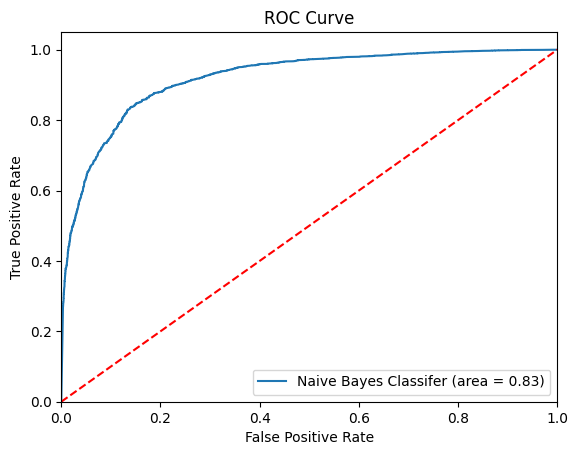

In [41]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve #plot the curve 

rf_roc_auc = roc_auc_score(y_test, X_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, X_2.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifer (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Analysis: XXXXXXXXXXXXXXXXXXXXX

# Applying Classification Method: Decision Tree

Next method that we chose is the classification method: Decision Tree, which is also good with categorical data.

In [42]:
# Using the optimal features scaled in previous steps

X_train, X_test, y_train, y_test = train_test_split( X_1, response, test_size=0.20, random_state=42)

## Build Decision Tree Model

In [43]:
#Using Decision Tree Algorithm for method Decision Tree Classifier

classifiers= [('Decision_Tree', DecisionTreeClassifier(max_depth=5, random_state=0))]
 
clf_list=[]
list_accuracy=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_classifier=0

#Pipeline  and using kfold for optimization 
for n, clf in  classifiers:
    pipe_clf= Pipeline([(n,clf) ])
    score = cross_val_score(pipe_clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = np.mean(score)
    clf_list.append(n)
    list_accuracy.append((n, mean_score))
    
    if best_classifier < mean_score:
        best_clf_mean=mean_score
        best_clf=(n, clf)

X_2 = best_clf[1]
results = np.array(list_accuracy)
results_df = pd.DataFrame(results, columns=['Name', 'MeanScore'])
results_df

,Name,MeanScore
0,Decision_Tree,0.8362084829850908


The mean score of 0.8362 suggests that the Decision Tree classifier performed well in predicting the target variable in the dataset. 

In [44]:
X_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

## Confusion Matrix - Decision Tree

In [45]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

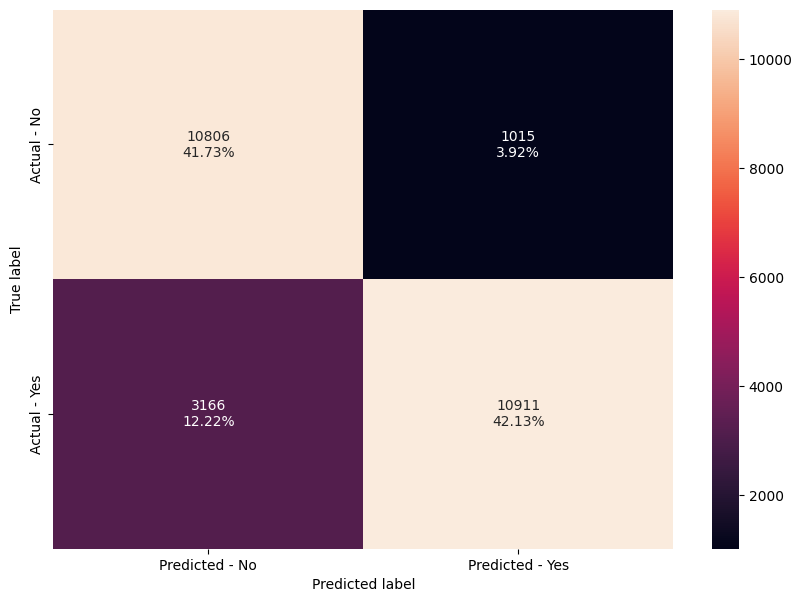

In [47]:

make_confusion_matrix(X_2,y_test)

Analysis: XXXXXXXXX

In [48]:
# Accuracy on train and test
print("Accuracy on training set : ",X_2.score(X_train, y_train))
print("Accuracy on test set : ",X_2.score(X_test, y_test))
# Recall on train and test
get_recall_score(X_2)

Accuracy on training set :  0.8365560049812238
Accuracy on test set :  0.8385589620820141
Recall on training set :  0.7748437637531908
Recall on test set :  0.7750941251687149


Accuracy:

* The accuracy on the training set is approximately 83.66%. The classifier correctly predicts the class of about 83.66% of the instances in the training dataset.
* The accuracy on the test set is approximately 83.86%. The classifier correctly predicts the class of about 83.86% of the instances in the test dataset.

Recall:

* The recall on the training set is approximately 77.48%. The classifier correctly identifies about 77.48% of the positive instances in the training dataset.
* The recall on the test set is approximately 77.51%. The classifier correctly identifies about 77.51% of the positive instances in the test dataset.


## ROC Curve - Decision Tree

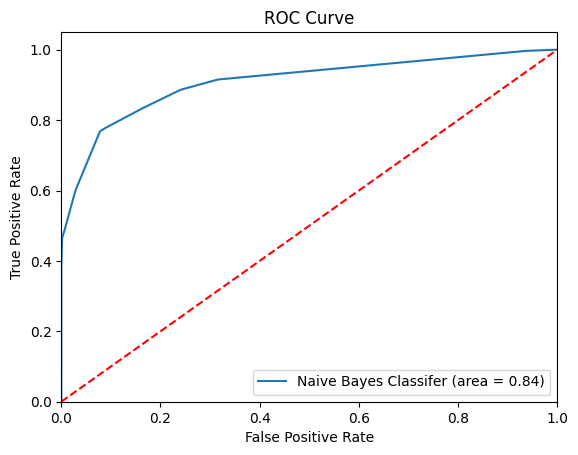

In [49]:

rf_roc_auc = roc_auc_score(y_test, X_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, X_2.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Classifer (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Analysis: XXXX

## Visualizing the Decision Tree

This graphical representation of the trained decision tree model provides valuable insights into how the model makes decisions and can help interpret its behavior. 

In [50]:

feature_names = list(df_features_selected_lr.columns)
feature_names


['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Seat comfort_1',
 'Seat comfort_2',
 'Seat comfort_3',
 'Seat comfort_4',
 'Seat comfort_5',
 'Departure/Arrival time convenient_5',
 'Food and drink_1',
 'Food and drink_2',
 'Food and drink_3',
 'Food and drink_4',
 'Inflight entertainment_1',
 'Inflight entertainment_2',
 'Inflight entertainment_3',
 'Inflight entertainment_5',
 'Online support_1',
 'Online support_5',
 'Ease of Online booking_3',
 'Ease of Online booking_4',
 'On-board service_5',
 'Leg room service_5',
 'Checkin service_5',
 'Cleanliness_5',
 'Online boarding_5']

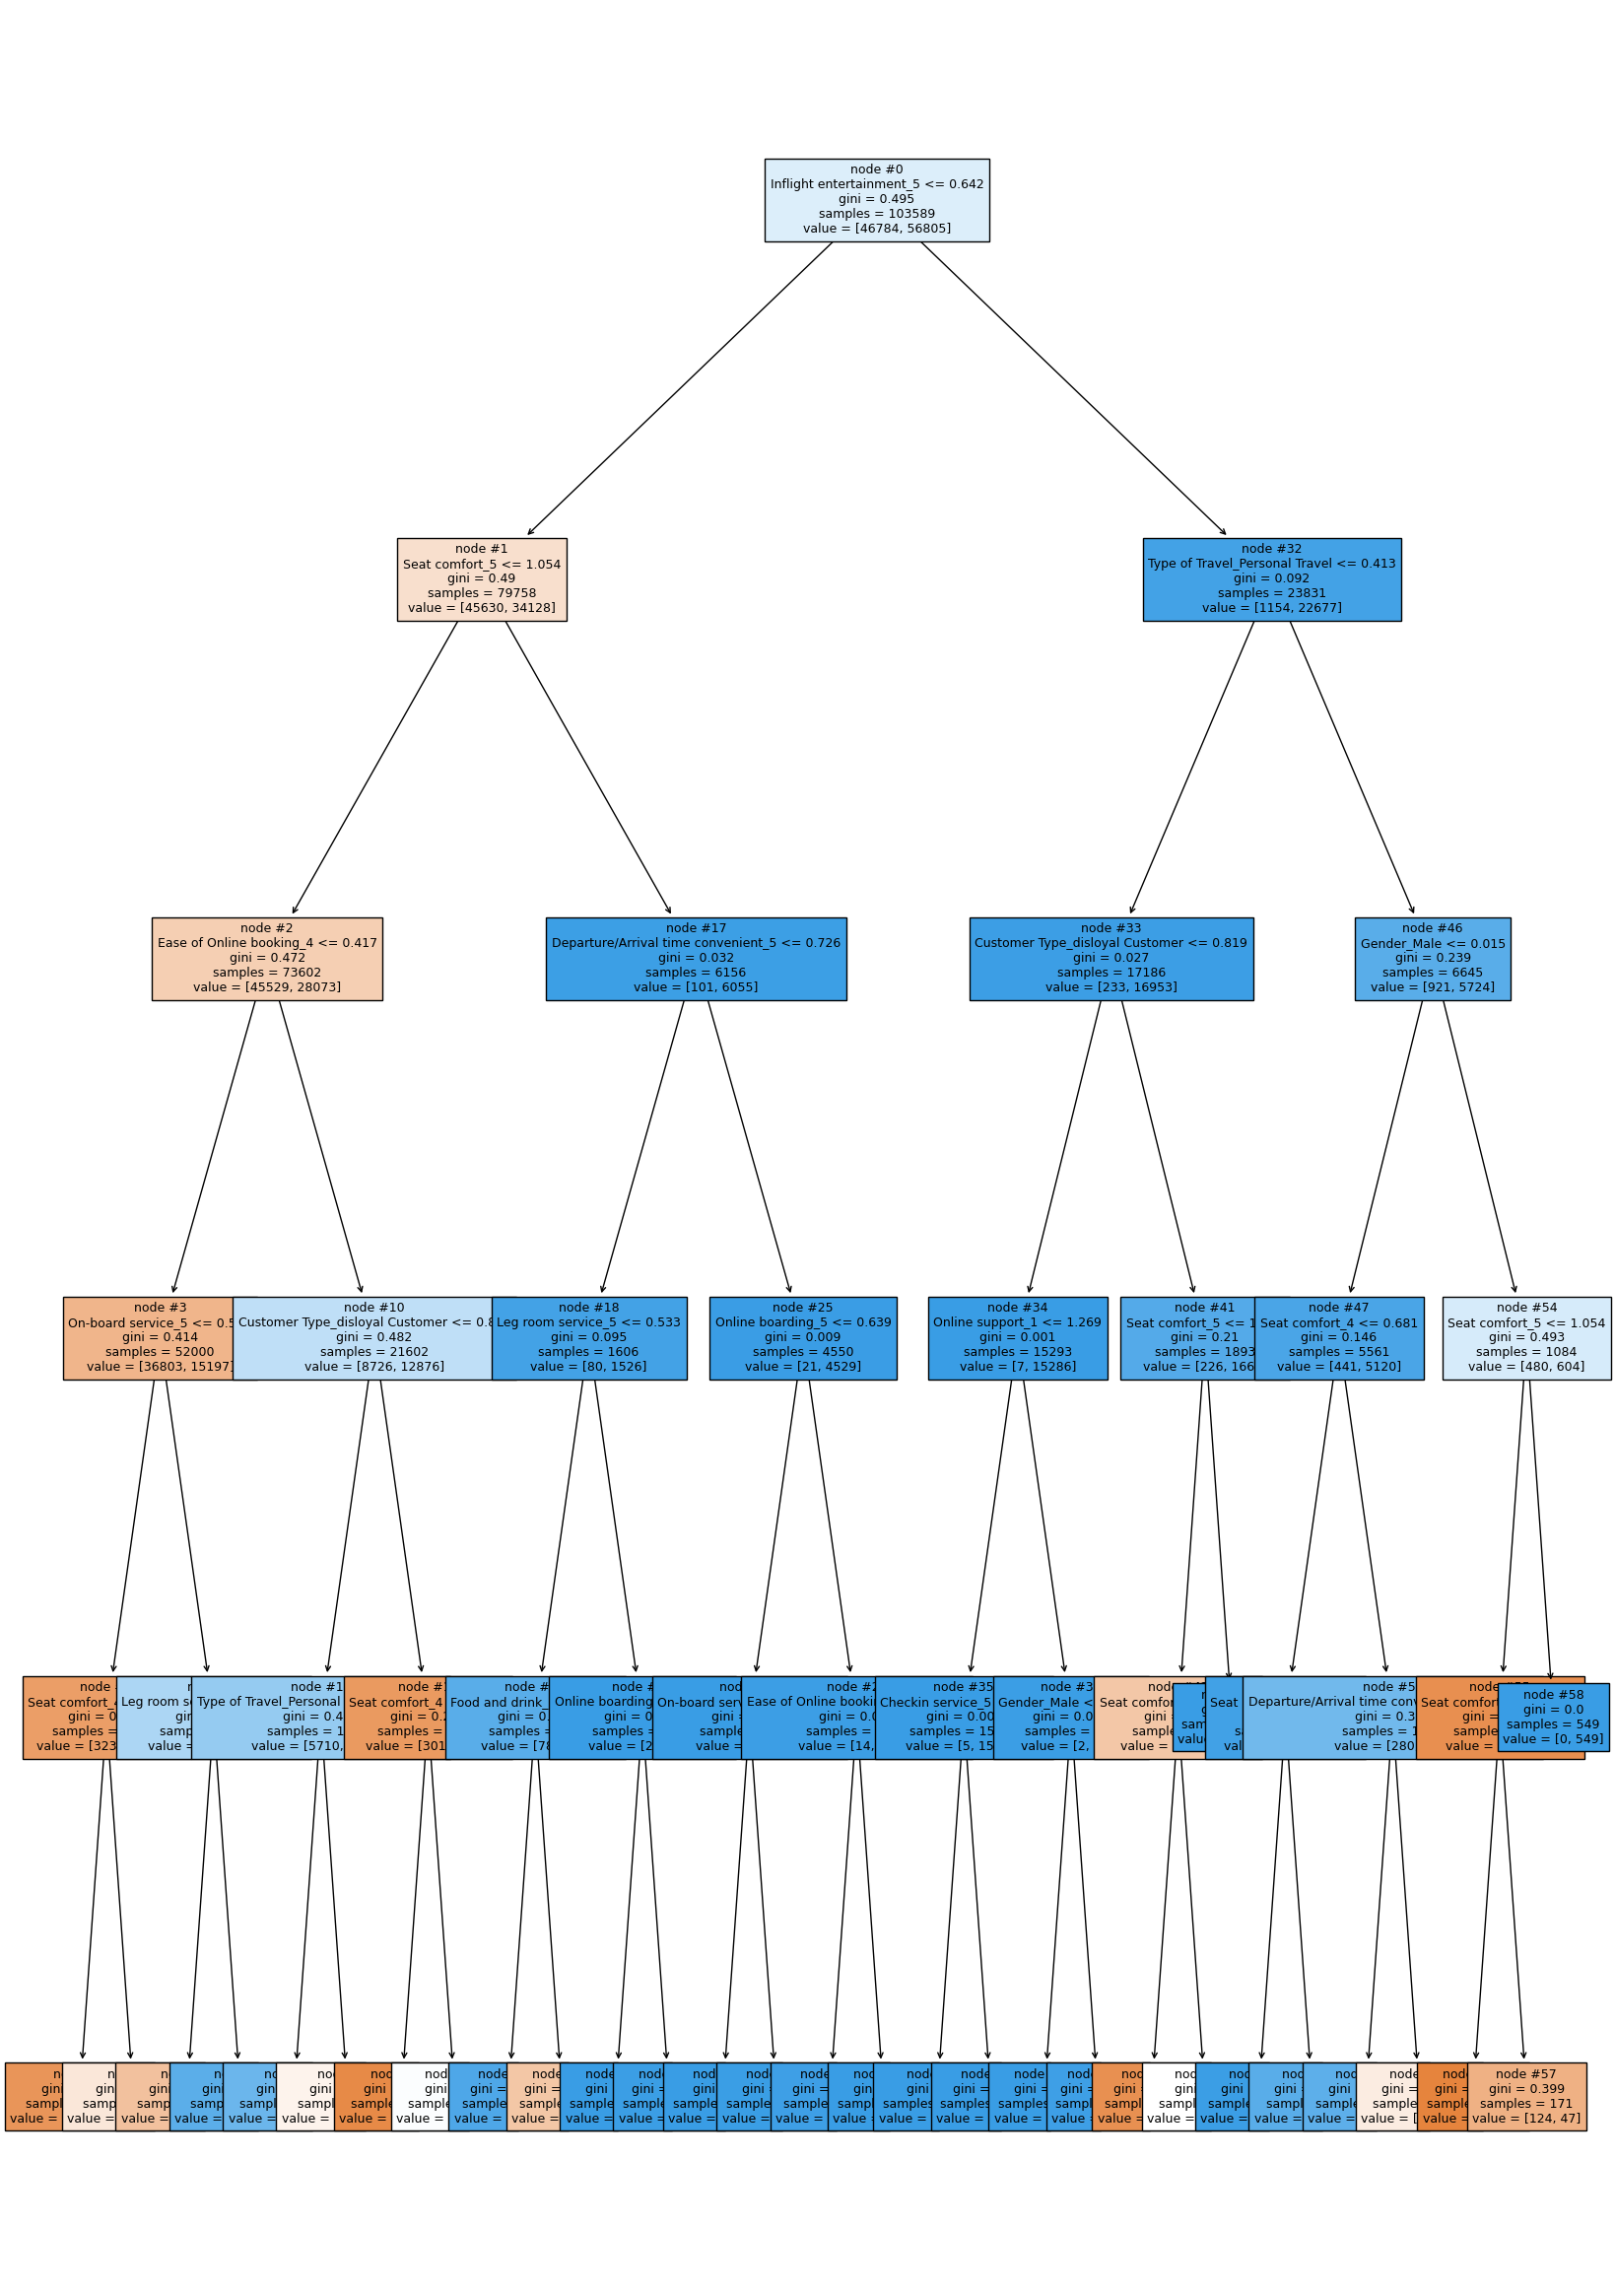

In [51]:
#Plot Decision Tree according to output algorith and max_depth=5

plt.figure(figsize=(20,30))
tree.plot_tree(X_2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
plt.show()

Below is the importance of each variables in predicting the target variable.

In [52]:
# Text report showing the rules of a decision tree -

print(tree.export_text(X_2,feature_names=feature_names,show_weights=True))


|--- Inflight entertainment_5 <= 0.64
|   |--- Seat comfort_5 <= 1.05
|   |   |--- Ease of Online booking_4 <= 0.42
|   |   |   |--- On-board service_5 <= 0.60
|   |   |   |   |--- Seat comfort_4 <= 0.68
|   |   |   |   |   |--- weights: [28792.00, 4621.00] class: 0
|   |   |   |   |--- Seat comfort_4 >  0.68
|   |   |   |   |   |--- weights: [3540.00, 2865.00] class: 0
|   |   |   |--- On-board service_5 >  0.60
|   |   |   |   |--- Leg room service_5 <= 0.53
|   |   |   |   |   |--- weights: [3461.00, 1762.00] class: 0
|   |   |   |   |--- Leg room service_5 >  0.53
|   |   |   |   |   |--- weights: [1010.00, 5949.00] class: 1
|   |   |--- Ease of Online booking_4 >  0.42
|   |   |   |--- Customer Type_disloyal Customer <= 0.82
|   |   |   |   |--- Type of Travel_Personal Travel <= 0.41
|   |   |   |   |   |--- weights: [2331.00, 9224.00] class: 1
|   |   |   |   |--- Type of Travel_Personal Travel >  0.41
|   |   |   |   |   |--- weights: [3379.00, 3058.00] class: 0
|   |   |   |---

In [53]:

# Set the display format for float numbers to 5 decimal places
pd.options.display.float_format = '{:.10f}'.format

# Create a DataFrame with feature importances and sort by importance in descending order
df_importances = pd.DataFrame(X_2.feature_importances_, columns=["Imp"], index=df_features_selected_lr.columns)
df_importances_sorted = df_importances.sort_values(by='Imp', ascending=False)

# Print the sorted DataFrame with 5 decimal places
print(df_importances_sorted)


                                             Imp
Inflight entertainment_5            0.3676329546
Seat comfort_5                      0.1750658576
On-board service_5                  0.1349440940
Ease of Online booking_4            0.1029245732
Customer Type_disloyal Customer     0.0607046969
Leg room service_5                  0.0588771668
Seat comfort_4                      0.0501260723
Type of Travel_Personal Travel      0.0370244608
Gender_Male                         0.0087597090
Departure/Arrival time convenient_5 0.0021669296
Food and drink_2                    0.0009152807
Seat comfort_3                      0.0008488337
Online boarding_5                   0.0000081220
Online support_1                    0.0000011255
Checkin service_5                   0.0000001234
Food and drink_4                    0.0000000000
Inflight entertainment_2            0.0000000000
Inflight entertainment_3            0.0000000000
Food and drink_3                    0.0000000000
Online support_5    

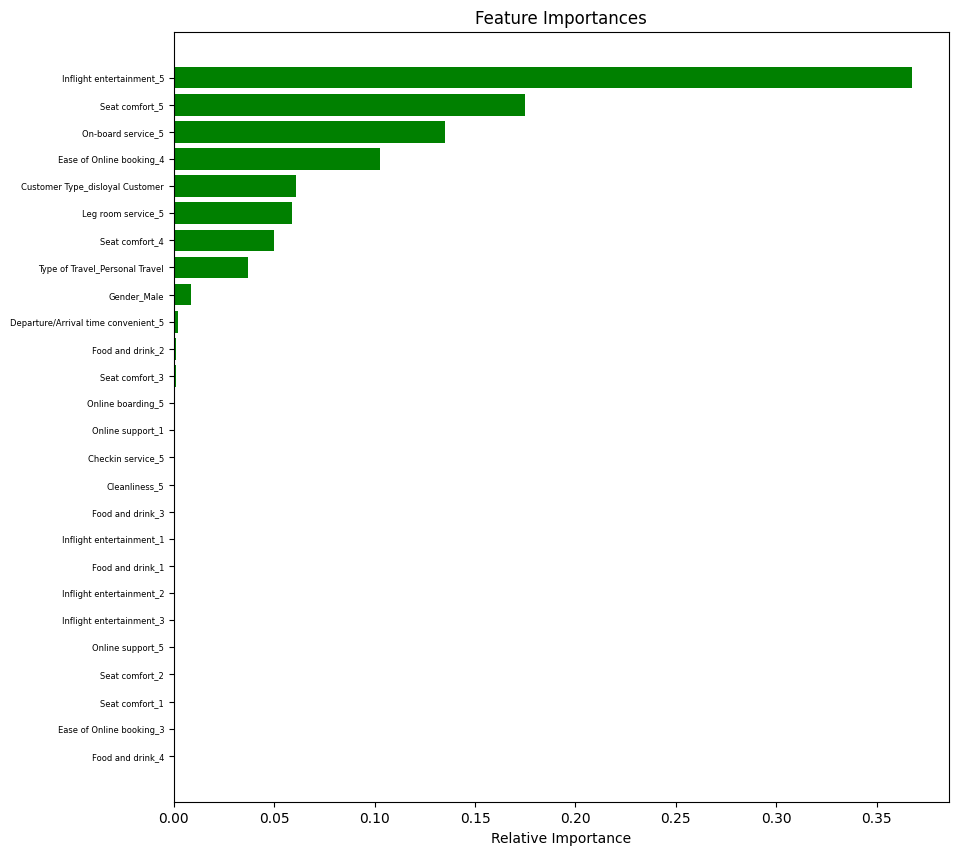

In [54]:
#Plot horizontal bar about features importance

importances = X_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=6)
plt.xlabel('Relative Importance')
plt.show()

According to the results, `Inflight entertainment_5` is the most relevant to predict the target variable. Other variables that are important are `Seat comfort_3`, `On-board service_5`, ease of `Online booking_4`, `Customer type_disloyal customer`, `Leg room service_5`, `Seat comfort_4`, `Type of travel_personal travel`, `Gender_male`, `Departure/arrival time convenient_5`, and `Deat_comfort_3`.

# Clustering Method: KMeans

The third method that we chose is clustering methos: KMeans. It is a versatile algorithm for partitioning datasets into clusters based on similarity.

In [ ]:

data = pd.read_csv("Invistico_Airline.csv")
df=pd.DataFrame(data)

#Remove all rows that contain NaN values in the original Dataframe
df.dropna(inplace=True)

#Reset the index for the original DataFrame. 

df.reset_index(drop=True,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [ ]:
df.head(10)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0000000000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0000000000
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0000000000
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0000000000
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0000000000
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0000000000
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0000000000
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0000000000
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0000000000
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0000000000


In [ ]:
# Create dummy variables for each categorical feature
for column in categorical_columns:
    # Create dummy variables with a prefix
    dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
    # Convert True/False to 1/0
    dummy_columns = dummy_columns.astype(int)
    # Add the dummy columns to the original DataFrame
    df = pd.concat([df, dummy_columns], axis=1)
    # Drop the original categorical column from the DataFrame
    df.drop(column, axis=1, inplace=True)

# Display the modified DataFrame with dummy variables
#print("\nDataFrame with dummy variables:")
df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,65,265,0,0.0000000000,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,47,2464,310,305.0000000000,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,15,2138,0,0.0000000000,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,60,623,0,0.0000000000,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,70,354,0,0.0000000000,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.head(10)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,65,265,0,0.0000000000,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,47,2464,310,305.0000000000,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,15,2138,0,0.0000000000,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,60,623,0,0.0000000000,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,70,354,0,0.0000000000,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
5,30,1894,0,0.0000000000,1,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
6,66,227,17,15.0000000000,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
7,10,1812,0,0.0000000000,1,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
8,56,73,0,0.0000000000,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9,22,1556,30,26.0000000000,1,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Calculation Number of Clusters

These steps are to find the number of clusters (k). The chosen techniques are Elbow Method and Silhouette Score.

### Elbow Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

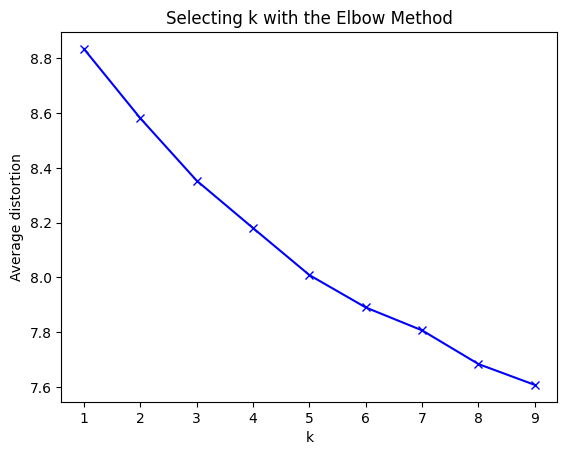

In [ ]:
#Finding optimal no. of clusters

# Disable the warning about the default value of `n_init`
warnings.filterwarnings('ignore', message='The default value of `n_init` will change from 10 to \'auto\' in 1.4.')

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Silhouette Score

C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a

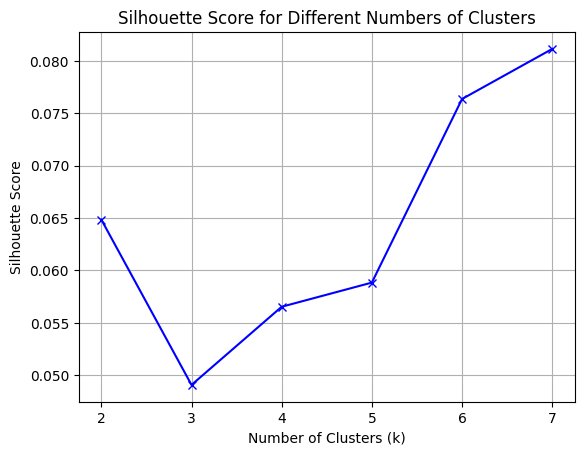

Optimal Number of Clusters: 7


In [ ]:
# Finding optimal number of clusters

clusters = range(2, 8)  # Start from 2 clusters
silhouette_scores = []

for k in clusters:
    model = MiniBatchKMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Find the optimal number of clusters based on the maximum silhouette score
optimal_clusters = clusters[np.argmax(silhouette_scores)]
print(f'Optimal Number of Clusters: {optimal_clusters}')


## Build Clustering Model

After finding the k which is 7, the next step is to build the clustering model.

In [ ]:
# K-means clustering
final_model = KMeans(n_clusters=7)
final_model.fit(df_scaled)
prediction = final_model.predict(df_scaled)

# Append the prediction to the original DataFrame
df["CLUSTER"] = prediction


In [ ]:
#Calculate the number of records per cluster

df_clust = df.groupby(['CLUSTER'])
df_clust['Age'].count()

CLUSTER
0    13725
1    21483
2    21836
3    33795
4    18996
5     6667
6    12985
Name: Age, dtype: int64

In [ ]:
df_clust = df.groupby(['CLUSTER'])
df_clust.mean()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
CLUSTER,,,,,,,,,,,,,,,,,,,,,
0,33.7122040073,2201.0204735883,18.1859380692,18.8695081967,0.2131876138,0.6287067395,0.3511111111,0.3580327869,0.6238979964,0.0979963570,...,0.0564663024,0.0888888889,0.2614207650,0.3859380692,0.2072859745,0.0002185792,0.9950455373,0.0009471767,0.0005100182,0.0029872495
1,46.1180933762,1724.3727598566,10.6269143043,10.7096308709,0.9141181399,0.3541870316,0.0058185542,0.2501512824,0.2433552111,0.0405436857,...,0.0002792906,0.0003723875,0.0016291952,0.9970209002,0.0006982265,0.0614904808,0.0606060606,0.3005166876,0.2941395522,0.2831541219
2,38.5778530866,1999.3387067228,16.4039201319,17.0408499725,0.3388441106,0.5280271112,0.2269188496,0.3080692435,0.4941381205,0.0807382304,...,0.0387433596,0.0618245100,0.5083348599,0.2521982048,0.1387616780,0.0491848324,0.0445594431,0.7473438359,0.0919582341,0.0668162667
3,40.3978990975,1946.1434235834,12.6919958574,13.0072200030,0.7738718745,0.4525521527,0.1350199734,0.3098979139,0.3994081965,0.0644474035,...,0.0390590324,0.0427282142,0.0831483947,0.1623021157,0.6727622429,0.0263944370,0.0295014055,0.1605562953,0.1615623613,0.6219855008
4,34.0891766688,2255.7484207202,17.0940724363,17.6388186987,0.5090018951,0.5692251000,0.2600547484,0.3369130343,0.5624868393,0.0908612339,...,0.0930722257,0.0937565803,0.1977258370,0.3589703095,0.2564224047,0.0006317119,0.0008949252,0.0026321331,0.9921562434,0.0034217730
5,47.8585570721,1598.7454627269,12.2825858707,12.7619619019,0.4283785811,0.3544322784,0.0157492125,0.2173391330,0.2846857657,0.0505474726,...,0.0011999400,0.9956502175,0.0014999250,0.0010499475,0.0005999700,0.1499925004,0.1576421179,0.2588870556,0.2804859757,0.1529923504
6,36.7957643435,2027.3155949172,17.2891028109,17.9601078167,0.1725837505,0.5811320755,0.3239892183,0.3623411629,0.5741239892,0.0893338467,...,0.2328070851,0.0708509819,0.2008471313,0.3181363111,0.1772814786,0.8477474008,0.0400462072,0.0540623797,0.0437427801,0.0144012322


C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


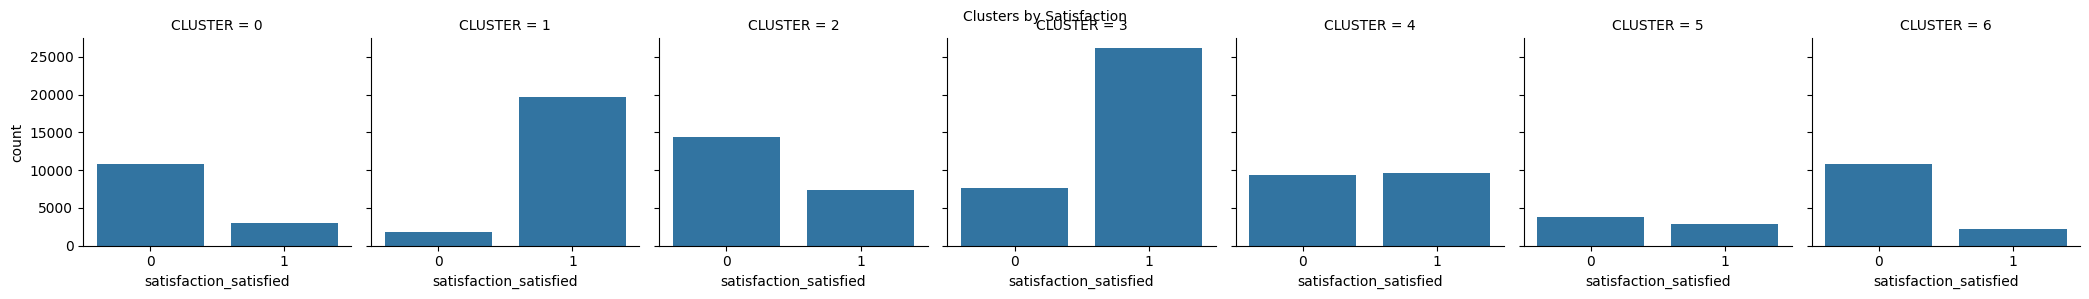

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, "satisfaction_satisfied")
g.set_titles(fontsize=7)  
g.set_axis_labels(fontsize=7)  
plt.suptitle("Clusters by Satisfaction", fontsize=10)
plt.show()


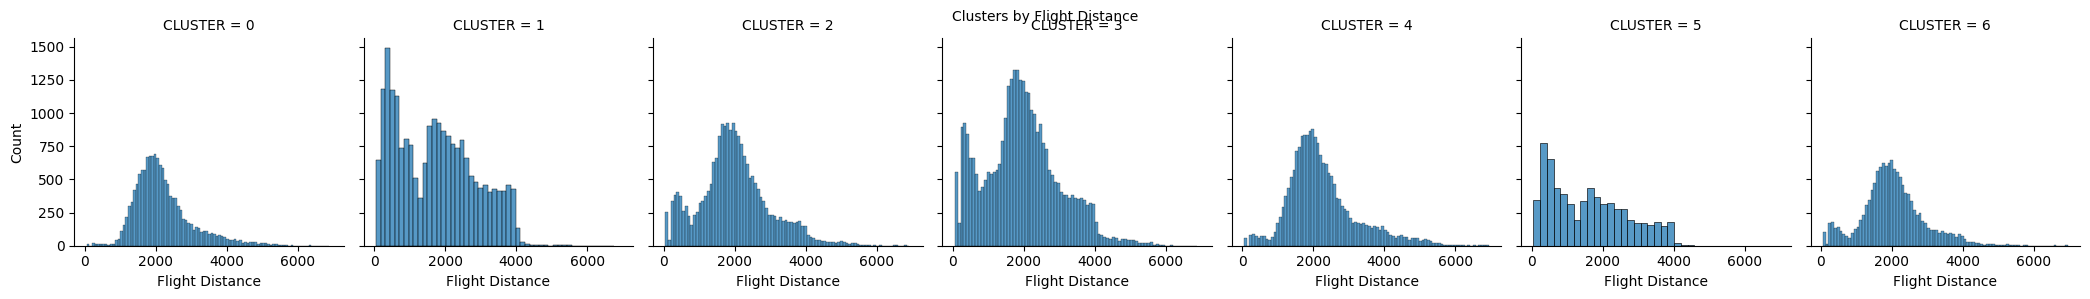

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.histplot, "Flight Distance");

g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Flight Distance", fontsize=10)
plt.show()

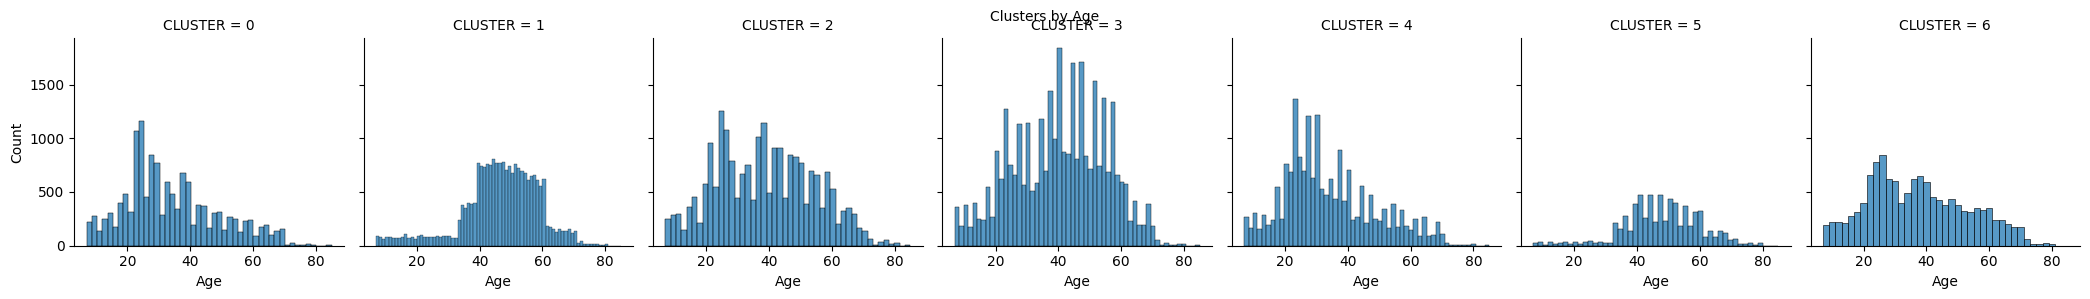

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.histplot, "Age")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Age", fontsize=10)
plt.show()

C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


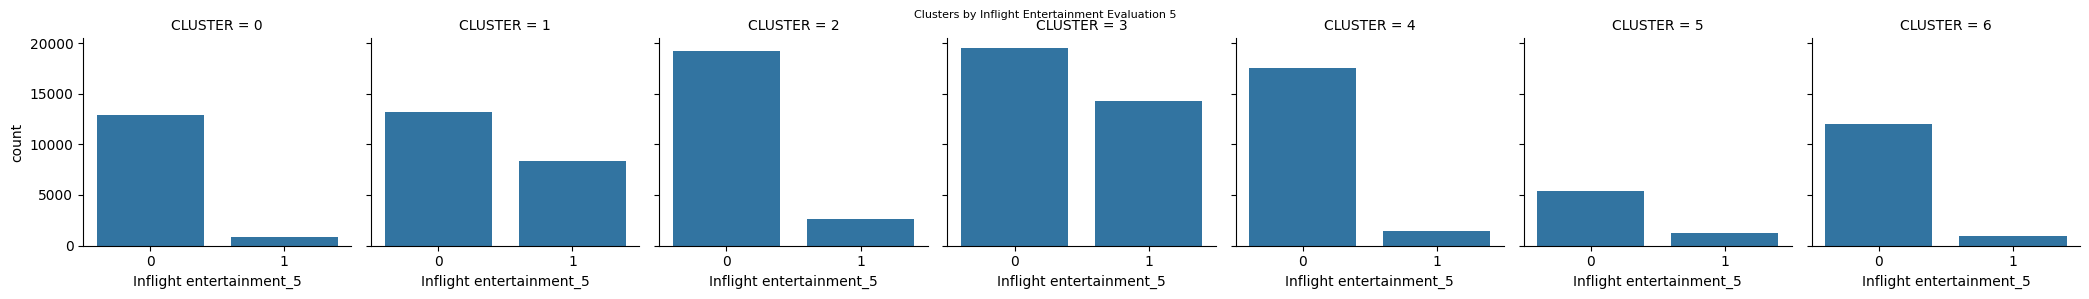

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, "Inflight entertainment_5")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Inflight Entertainment Evaluation 5", fontsize=8)
plt.show()

C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


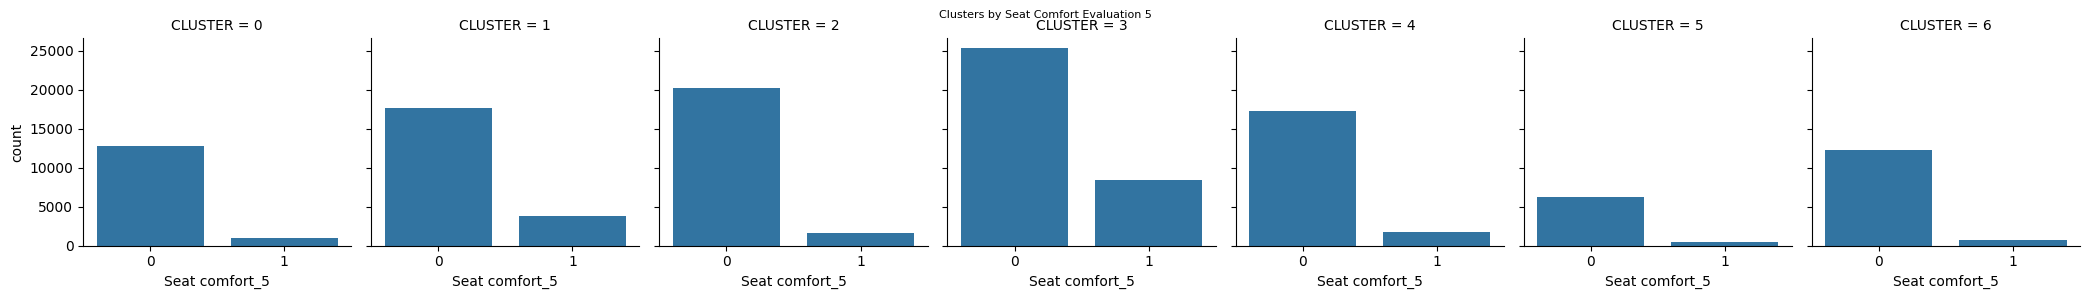

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, "Seat comfort_5")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Seat Comfort Evaluation 5", fontsize=8)
plt.show()


C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


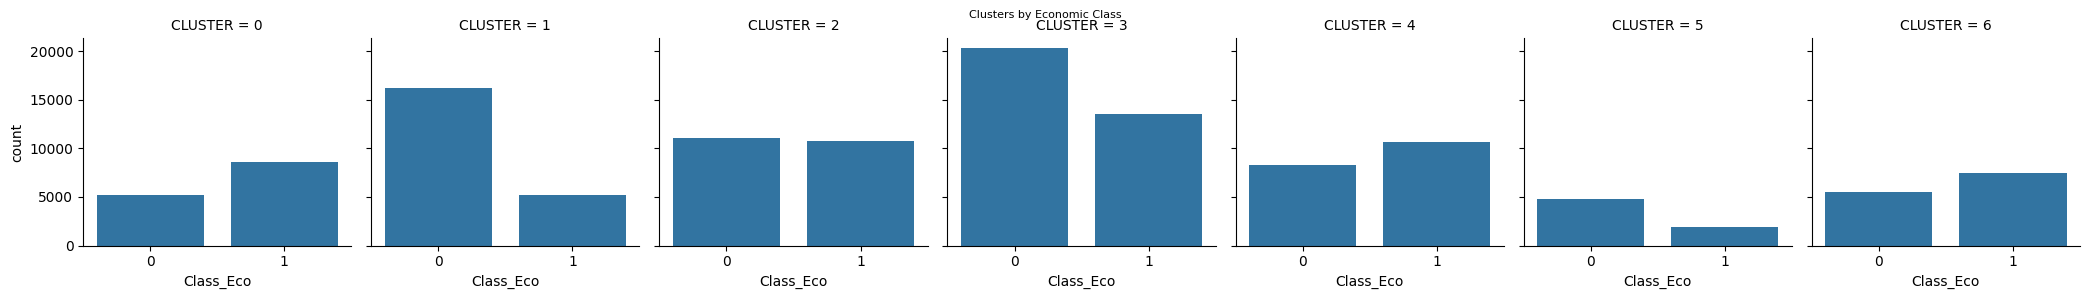

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, "Class_Eco")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Economic Class", fontsize=8)
plt.show()

C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


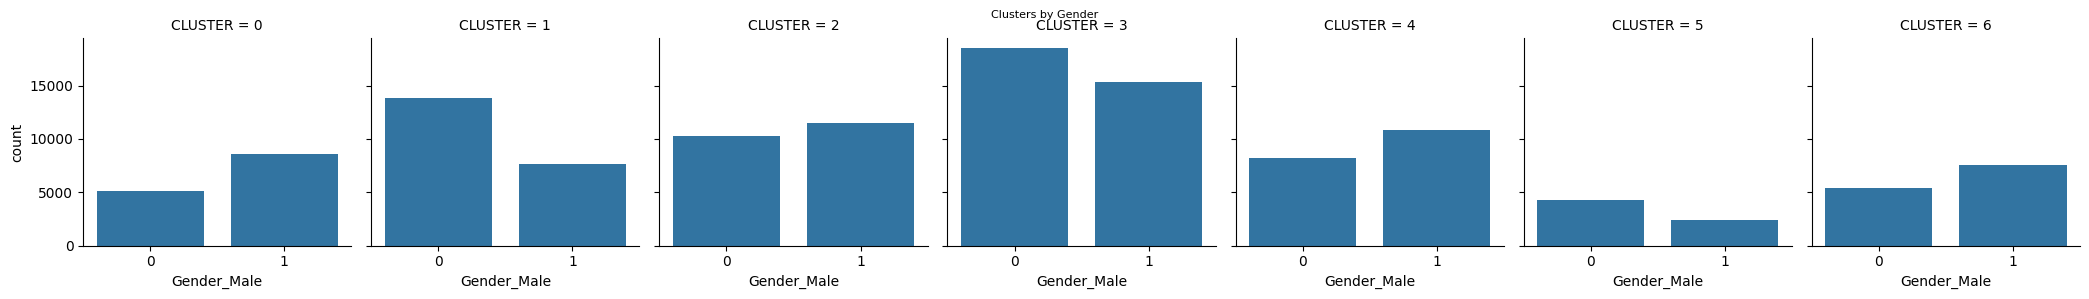

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, "Gender_Male")
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Gender", fontsize=8)
plt.show()

C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


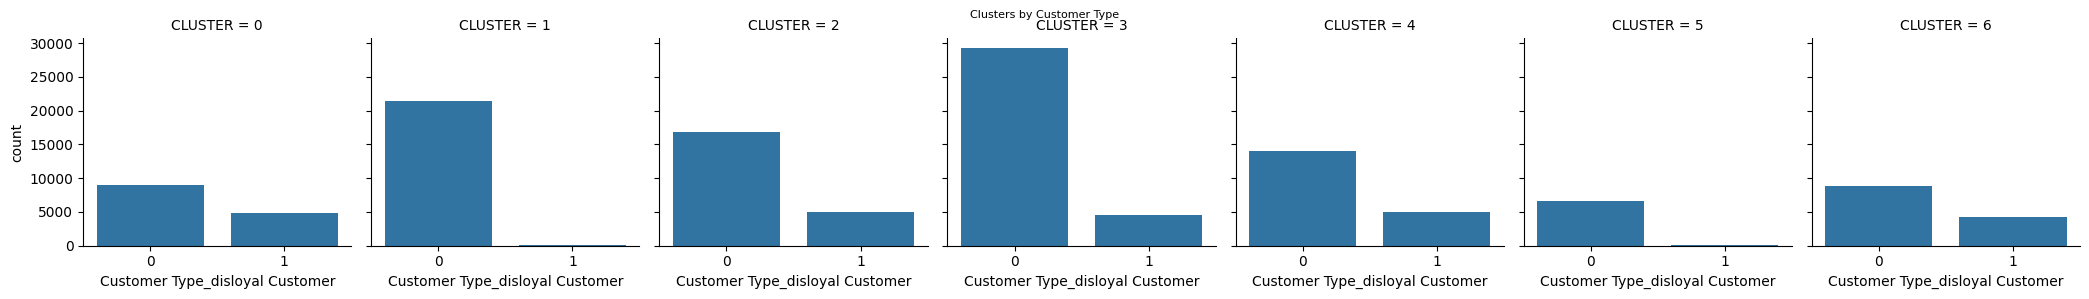

In [ ]:
#Plotting the clusters
g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, 'Customer Type_disloyal Customer')
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Customer Type", fontsize=8)
plt.show()


C:\Users\sergi\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


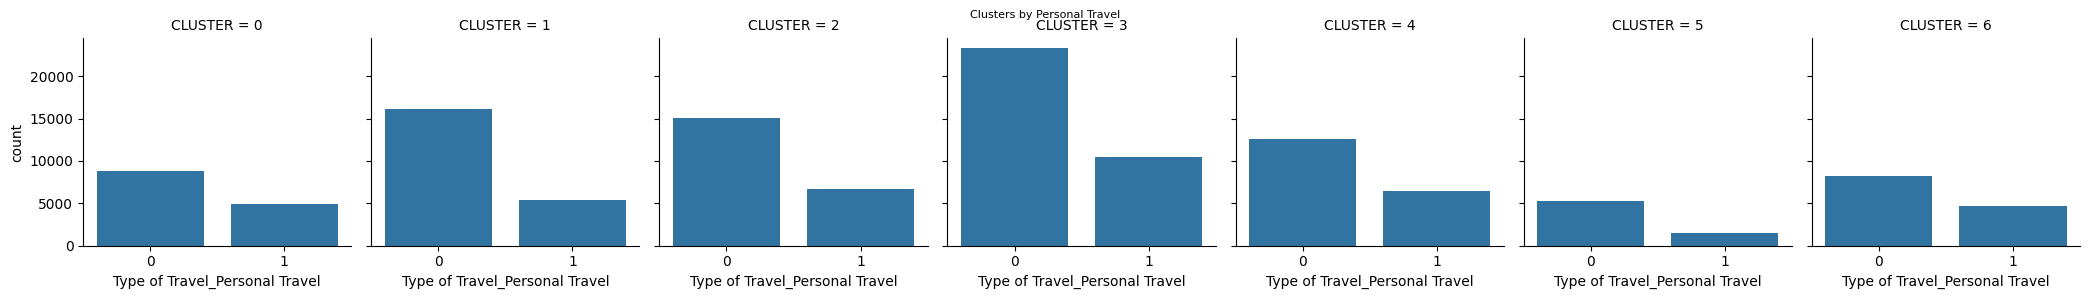

In [ ]:
#Plotting the clusters

g = sns.FacetGrid(df, col="CLUSTER")
g.map(sns.countplot, 'Type of Travel_Personal Travel')
g.set_titles(fontsize=8)  
g.set_axis_labels(fontsize=8)  
plt.suptitle("Clusters by Personal Travel", fontsize=8)
plt.show()


Analysis: XXXXX